In [143]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import os
import sqlite3
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### Objective

The data is for company X which is trying to control attrition. There are two sets of data: “Existing employees” and “Employees who have left”. Following attributes are available for every employee.
 - Satisfaction Level
 - Last evaluation
 - Number of projects
 - Average monthly hours
 - Time spent at the company
 - Whether they have had a work accident
 - Whether they have had a promotion in the last 5 years
 - Departments (column sales)
 - Salary
 - Whether the employee has left

In [144]:
# loading dataset.
df = pd.read_csv('../datasets/HR_COM1.CSV')
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,1,0,sales,low
1,2,0.80,0.86,5,262,6,0,1,0,sales,medium
2,3,0.11,0.88,7,272,4,0,1,0,sales,medium
3,4,0.72,0.87,5,223,5,0,1,0,sales,low
4,5,0.37,0.52,2,159,3,0,1,0,sales,low


In [145]:
shape_rows = df.shape[0]
shape_columns = df.shape[1]

print(f'Dataset rows = {shape_rows} and columns = {shape_columns}.')

Dataset rows = 14999 and columns = 11.


In [146]:
# Check to see if there are missing values in data set
df.isna().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [147]:
df.dtypes

Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [148]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [149]:
df.head(10)

,Emp ID,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,dept,salary
0,1,0.38,0.53,2,157,3,0,1,0,sales,low
1,2,0.80,0.86,5,262,6,0,1,0,sales,medium
2,3,0.11,0.88,7,272,4,0,1,0,sales,medium
3,4,0.72,0.87,5,223,5,0,1,0,sales,low
4,5,0.37,0.52,2,159,3,0,1,0,sales,low
5,6,0.41,0.50,2,153,3,0,1,0,sales,low
6,7,0.10,0.77,6,247,4,0,1,0,sales,low
7,8,0.92,0.85,5,259,5,0,1,0,sales,low
8,9,0.89,1.00,5,224,5,0,1,0,sales,low
9,10,0.42,0.53,2,142,3,0,1,0,sales,low


In [150]:
# From observation about 76.1% of employees stayed and 23.8% of employees left.
print(df['turnover'].value_counts(normalize=True).map('{:.2%}'.format))

0    76.19%
1    23.81%
Name: turnover, dtype: object


In [151]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,Emp ID,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,,
0,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


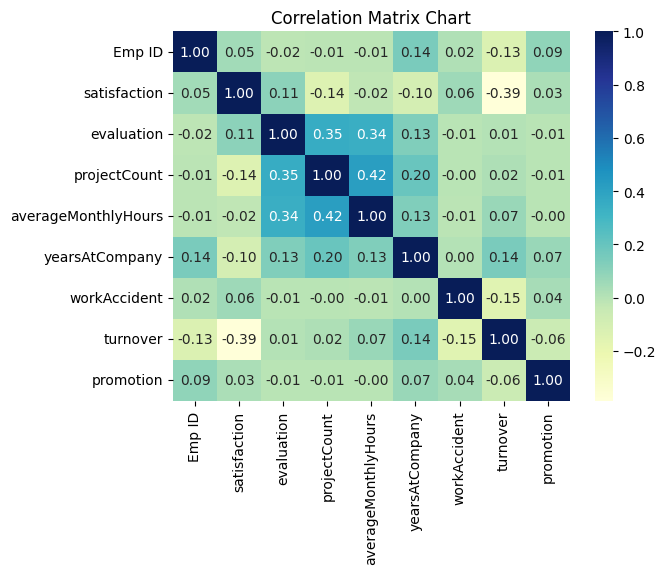

,Emp ID,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
Emp ID,1.000000,0.045841,-0.018168,-0.012124,-0.009850,0.144159,0.015931,-0.129047,0.088994
satisfaction,0.045841,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,-0.018168,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.012124,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.009850,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,0.144159,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.015931,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.129047,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.088994,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [152]:
corr = df.corr()
corr = (corr)
ax = plt.axes()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax, fmt=".2f", cmap="YlGnBu", cbar=True, annot = True)
ax.set_title('Correlation Matrix Chart')
plt.show()
corr

In [153]:
def plot_hist(column):
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
    medianprops = dict(linestyle='-', linewidth=2, color='yellow')
    sns.boxplot(x=df[f'{column}'], color='lightcoral', saturation=1, medianprops=medianprops,
            flierprops={'markerfacecolor': 'mediumseagreen'}, whis=1.5, ax=ax1)

    mean = df[f'{column}'].mean()
    std = df[f'{column}'].std()
    q1, median, q3 = np.percentile(df[f'{column}'], [25, 50, 75])
    iqr = q3 - q1

    ticks = [mean + std * i for i in range(-4, 5)]
    ticklabels = [f'${i}\\sigma$' for i in range(-4, 5)]
    ax1.set_xticks(ticks)
    ax1.set_xticklabels(ticklabels)
    ax1.set_yticks([])
    ax1.tick_params(labelbottom=True)
    ax1.set_ylim(-1, 1.5)
    ax1.errorbar([q1, q3], [1, 1], yerr=[0, 0.2], color='black', lw=1)
    ax1.text(q1, 0.6, 'Q1', ha='center', va='center', color='black')
    ax1.text(q3, 0.6, 'Q3', ha='center', va='center', color='black')
    ax1.text(median, -0.6, 'median', ha='center', va='center', color='black')
    ax1.text(median, 1.2, 'IQR', ha='center', va='center', color='black')
    ax1.text(q1 - 1.5*iqr, 0.4, 'Q1 - 1.5*IQR', ha='center', va='center', color='black')
    ax1.text(q3 + 1.5*iqr, 0.4, 'Q3 + 1.5*IQR', ha='center', va='center', color='black')
    # ax1.vlines([q1 - 1.5*iqr, q1, q3, q3 + 1.5*iqr], 0, -2, color='darkgrey', ls=':', clip_on=False, zorder=0)

    sns.kdeplot(df[f'{column}'], ax=ax2)
    kdeline = ax2.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()

    ylims = ax2.get_ylim()
    ax2.fill_between(xs, 0, ys, color='mediumseagreen')
    ax2.fill_between(xs, 0, ys, where=(xs >= q1 - 1.5*iqr) & (xs <= q3 + 1.5*iqr), color='skyblue')
    ax2.fill_between(xs, 0, ys, where=(xs >= q1) & (xs <= q3), color='lightcoral')
    # ax2.vlines([q1 - 1.5*iqr, q1, q3, q3 + 1.5*iqr], 0, 100, color='darkgrey', ls=':', zorder=0)
    ax2.set_ylim(0, ylims[1])
    plt.show()

In [154]:
df_hists = df.drop(columns=['dept', 'salary'])

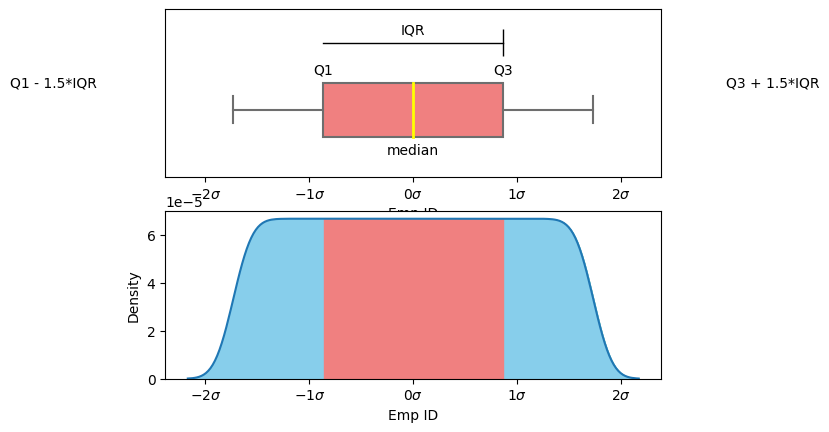

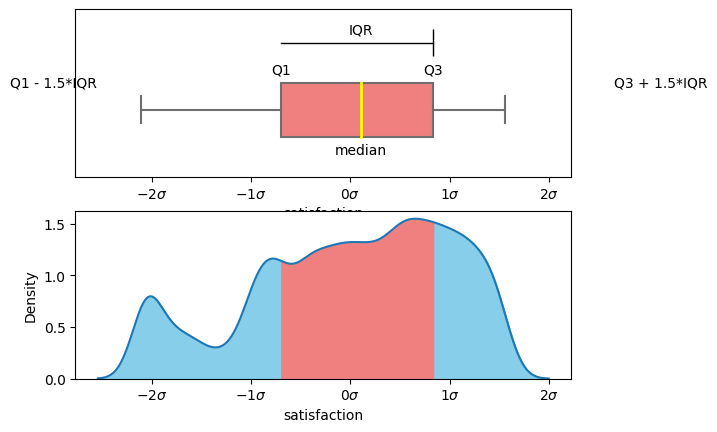

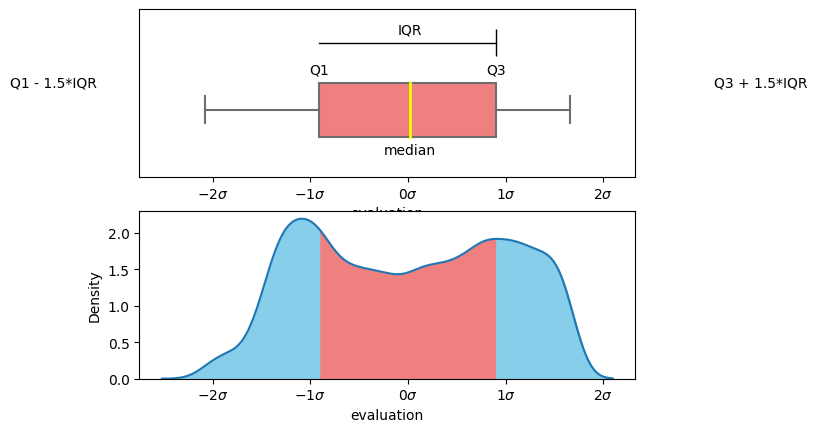

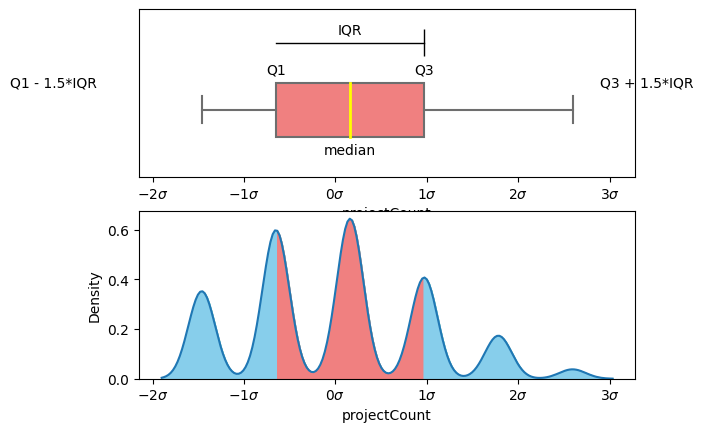

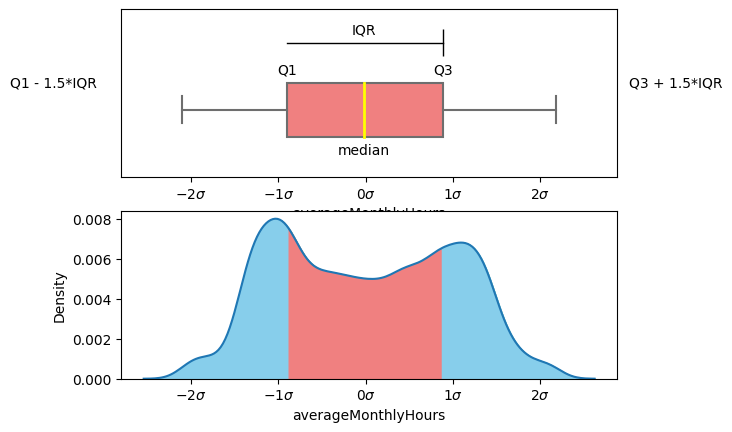

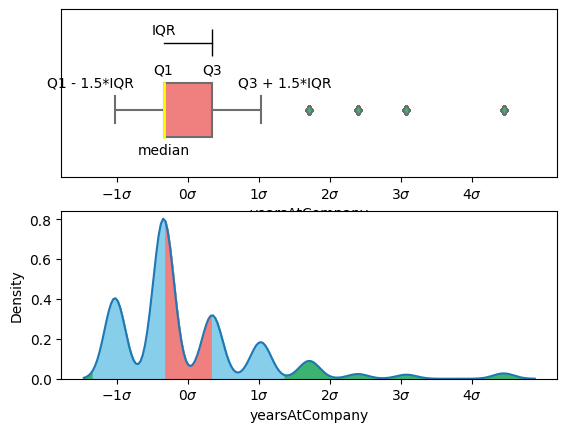

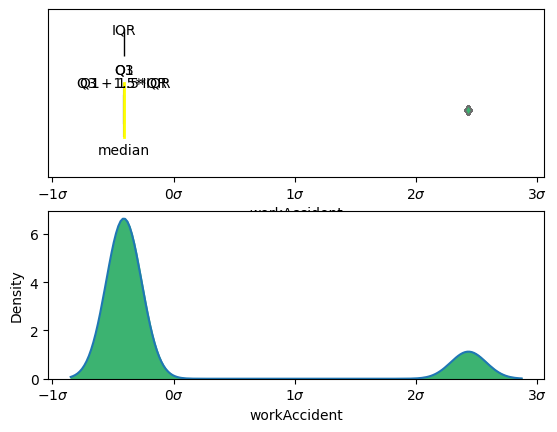

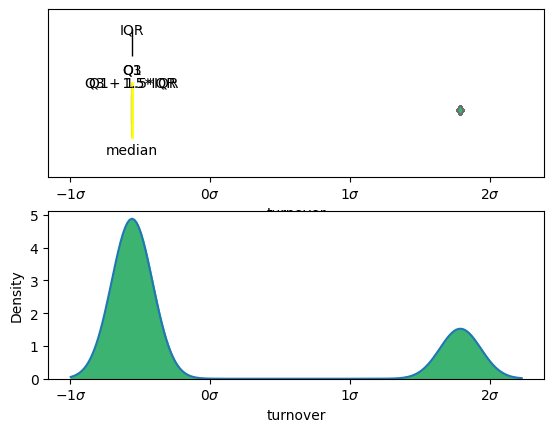

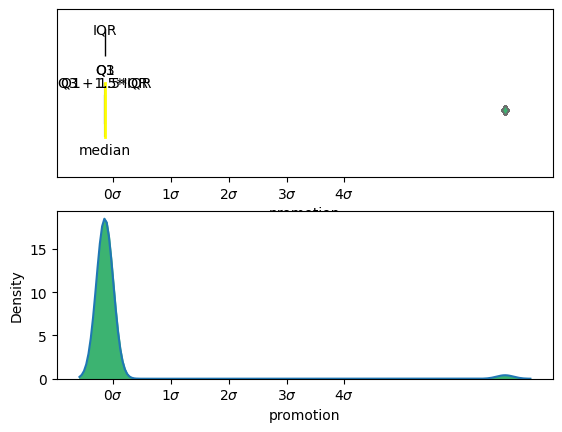

In [155]:
for column in df_hists.columns:
    plot_hist(column)